# TD - TP 1 Apprentissage supervisé - **PIVOT REMY LOUA**

## Exercice 1 : Construction du jeu d’entrainement et de test


### 1. Importez le jeu de données de fleurs d’iris en utilisant 

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [89]:
iris = load_iris()
X = iris.data
y= iris.target 

### 2. Combien d’échantillons y a-t-il dans ce jeu de données?

In [90]:
print("Nous avons ",X.shape)

Nous avons  (150, 4)


$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & x^{(1)}_3 & x^{(1)}_4 \\ ... & ... & ...& ... \\ x^{(m)}_1 & x^{(m)}_2 & x^{(m)}_3 & x^{(m)}_4 \end{bmatrix}$ *le vecteur $X$ contient les features avec m = 150 exemples*

$y = \begin{bmatrix} y^{(1)}\\...\\y^{(m)} \end{bmatrix}$ *le vecteur $y$ contient les labels*

### 3. Affichez le nuage de points

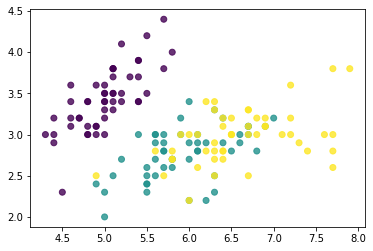

In [91]:
plt.scatter(X[ :,0],X[ :,1], c=y, alpha=0.8)

Nous avons 3 classes, ce qui peut confirmer avec le resultat du code si dessous

<AxesSubplot:xlabel='0'>

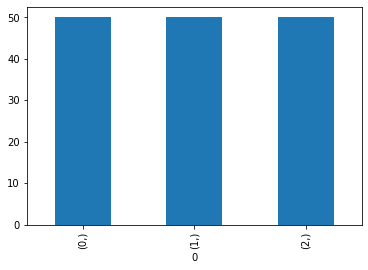

In [92]:
import pandas as pd
pd.DataFrame(y)[:].value_counts().plot.bar()

ce qui confirme bien les 3 classes

### 3. Divisez ce jeu de données en utilisant 

In [93]:
from sklearn.model_selection import train_test_split

### 3.a  Prenez t=0.5 puis affichez les dimensions du X_train et de X_test

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.5) 

In [95]:
print('Train set :', X_train.shape)
print('Test set  :', X_test.shape)

Train set : (75, 4)
Test set  : (75, 4)


En fisant t=0.5 nous avons recuperer 50% pour le train set donc 150*50/100 = 75 exemples et 50% pour test set ce qui correspond à 75 exemples 

### 3.b Prenez t=0.2 puis affichez les dimensions du X_train et de X_test 

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2) 
print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (120, 4)
Test set : (30, 4)


cette fois 80% pour les train set et 20% pour le test set

### 3.c Quelle est l’utilité du paramètre t ?

le t permet de donner le pourcentage du test set, ce qui permet d'enduire le pourcentage du train set

### 4. On souhaite prendre 80% des données pour l’entrainement et le reste pour le test

80% pour train set ce qui donne 20% pour le test set soit t=0.2

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2) 

#### 4.a) Visualisez le nuage de points en utilisant la fonction scatter 

Text(0.5, 1.0, 'Test Set')

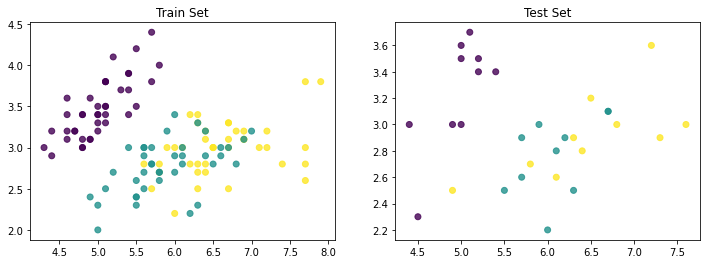

In [98]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[ :,0], X_train[ :,1], c=Y_train, alpha = 0.8) 
plt.title('Train Set')
plt.subplot(122)
plt.scatter(X_test[ :,0], X_test[ :,1], c=Y_test, alpha = 0.8)
plt.title('Test Set') 

Comme on peut voir sur les données nous avons diviser notre dataset, ( 80% pour le train_set et 20 % pour le test_set)

### 5. Pour la construction du jeu d’entrainement et de test, ajoutez le paramètre « random_state »

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state =5)

#### 5.a Visualisez les nuages de points du jeu d’entrainement et de test en vous appuyant sur la question 4.a

Text(0.5, 1.0, 'Test Set')

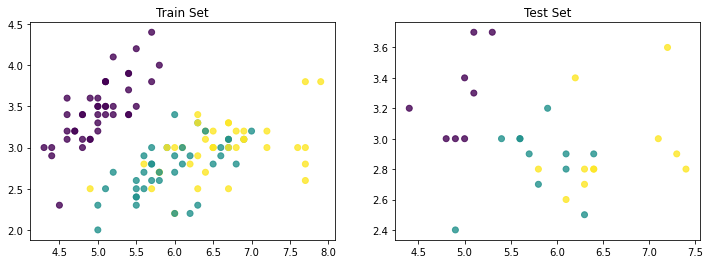

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[ :,0], X_train[ :,1], c=Y_train, alpha = 0.8) 
plt.title('Train Set')
plt.subplot(122)
plt.scatter(X_test[ :,0], X_test[ :,1], c=Y_test, alpha = 0.8)
plt.title('Test Set') 

#### 5.b) Relancez une deuxième fois, déduisez le rôle de ce nouveau paramètre. 

Text(0.5, 1.0, 'Test Set')

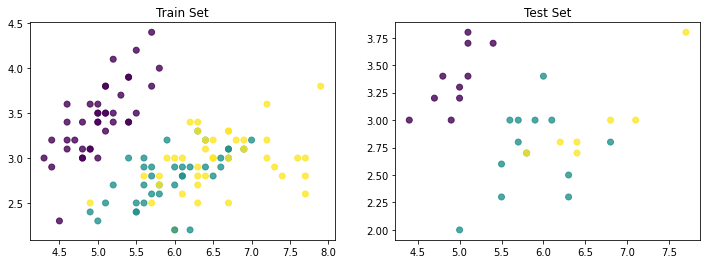

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state =10)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[ :,0], X_train[ :,1], c=Y_train, alpha = 0.8) 
plt.title('Train Set')
plt.subplot(122)
plt.scatter(X_test[ :,0], X_test[ :,1], c=Y_test, alpha = 0.8)
plt.title('Test Set') 

random_state est la graine utilisée par le générateur de nombres aléatoires

## Exercice 2 : Entrainement et évaluation du modèle 

On s’intéresse à l’entrainement et à l’évaluation d’un modèle de machine learning en faisant appel à la
bibliothèque sklearn. On choisit le modèle KNeighborsClassifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier

### 1. On définit le modèle comme suit

In [103]:
model = KNeighborsClassifier(1) # en fixant le nombre de voisin à un 1

### 2. Entraînement du modèle 

In [104]:
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

### 3. Evaluez le modèle, en utilisant « model.score » :

#### 3.a sur ces mêmes données : model.score(X_train, y_train) 

In [105]:
print("score sur le train set ",model.score(X_train, Y_train))

score sur le train set  1.0


nous avons un score de 100% ce qui est logique car nous avons testé le modèle avec les données de l'apprentissage

#### 3.b sur les données qui n’ont pas été vues par le modèle, commentez le score obtenu

In [106]:
print("score sur le test set ",model.score(X_test, Y_test))

score sur le test set  0.9666666666666667


Nous avons un score de 90% sur les données de test, ce qui n'est pas mal

## Exercice 3 : Amélioration de l’entrainement et évaluation du modèle

### 1 Comparez les performances du modèle lorsque le nombre de voisins est égal à 3 puis à 4.
Spécifiez le jeu de données sur lequel vous avez comparé les performances

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state =5)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,Y_train, test_size=0.2, random_state =5)


In [108]:
modeln_3 = KNeighborsClassifier(3) # en fixant le nombre de voisin à un 3
modeln_4 = KNeighborsClassifier(4) # en fixant le nombre de voisin à un 4


In [109]:
modeln_3.fit(X_train, Y_train)
print("score sur validation set pour n= 3 : ",modeln_3.score(X_validation, Y_validation))
print("score sur train      set pour n= 3 : ",modeln_3.score(X_train, Y_train))
modeln_4.fit(X_train, Y_train)
print("score sur validation set pour n= 4 : ",modeln_4.score(X_validation, Y_validation))
print("score sur train      set pour n= 4 : ",modeln_4.score(X_train, Y_train))

score sur validation set pour n= 3 :  1.0
score sur train      set pour n= 3 :  0.9791666666666666
score sur validation set pour n= 4 :  0.9166666666666666
score sur train      set pour n= 4 :  0.96875


Nous remarquons que le nombre de voisins à 3 donne de bonnes performances par rapport au nombre de voisins à 4

### 2) Spécifiez le jeu de données sur lequel l’évaluation finale est réalisée

l'évaluation final se fera sur le dataset de test X_test et Y_test, car ces données sont inconnu par notre modèle, les données utilisées pour choisir le bon modèle est effectué avec la validation set

### 3) Modifiez le découpage du jeu de données, puis analysez les nouvelles performances.

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state =5)
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train,Y_train, test_size=0.2, random_state =5)

modeln_3 = KNeighborsClassifier(3) 
modeln_3.fit(X_train, Y_train)
modeln_3.fit(X_train, Y_train)

modeln_6 = KNeighborsClassifier(6) 
modeln_6.fit(X_train, Y_train)
modeln_6.fit(X_train, Y_train)

print("score sur train      set pour n= 3 : ",modeln_3.score(X_train, Y_train))
print("score sur validation set pour n= 3 : ",modeln_3.score(X_validation, Y_validation))
print("score sur test       set pour n= 3 : ",modeln_3.score(X_test, Y_test))

print("score sur train      set pour n= 6 : ",modeln_6.score(X_train, Y_train))
print("score sur validation set pour n= 6 : ",modeln_6.score(X_validation, Y_validation))
print("score sur test       set pour n= 6 : ",modeln_6.score(X_test, Y_test))

score sur train      set pour n= 3 :  0.9791666666666666
score sur validation set pour n= 3 :  1.0
score sur test       set pour n= 3 :  0.9666666666666667
score sur train      set pour n= 6 :  0.96875
score sur validation set pour n= 6 :  0.9166666666666666
score sur test       set pour n= 6 :  0.9333333333333333


Rien ne nous garantit que nous avons fait le bon choix, car peut-être une autre portion du dataset peut donner un résultat diffèrent, c'est pourquoi on fait appel à le cross validation pour trouver les bons hyper paramètres 

### 4) Pour comparer deux modèles, l’entrainement et la validation s’appuie sur la stratégie de la crossvalidation

Cette technique nous permet d'entrainer et valider notre modèle sur plusieurs decoupe du train set

#### 4.a  technique de cross-validation sur sklearn

In [111]:
from sklearn.model_selection import cross_val_score

#### 4.b On se propose de découper le jeu de données en 5 parties

In [112]:
print("le score est le suivant :")
print(cross_val_score(KNeighborsClassifier(3), X_train, Y_train, cv=5,scoring ='accuracy'))

le score est le suivant :
[0.95       1.         0.94736842 1.         0.89473684]


nous avons ci-dessus 5 score score pour nos 5 validations

#### 4.c Au final on moyenne les 5 scores obtenus

In [113]:
val_score=[]
for k in range(1,50) :
    score = cross_val_score(KNeighborsClassifier(k), X_train, Y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score) 

#### 4.d Tracez les scores en fonction du nombre de voisins fixés

Text(0, 0.5, 'score')

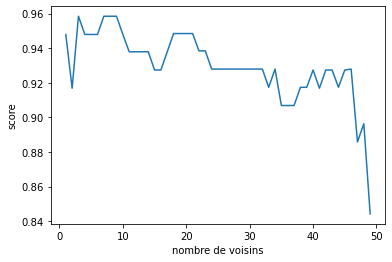

In [114]:
plt.plot(range(1,50),val_score)
plt.xlabel("nombre de voisins")
plt.ylabel("score")

In [115]:
np.where(val_score==max(val_score))

(array([2, 6, 7, 8], dtype=int64),)

nous remarquons qu'on obtient les meilleurs performances  pour k= 2 ou 6 ou 7 ou 8

#### 4.e) validate_curve

In [116]:
from sklearn.model_selection import validation_curve

In [117]:
model = KNeighborsClassifier()
k = np.arange(1,50)
train_score,val_score=validation_curve(model, X_train, Y_train, 'n_neighbors', k, cv=5) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [118]:
print("Train score shape ",train_score.shape)
print("Train score shape ",val_score.shape)

Train score shape  (49, 5)
Train score shape  (49, 5)


#### 4.f) Calculez les scores moyens (val_score.mean(axis=1))

Text(0.5, 0, 'n_neighbors')

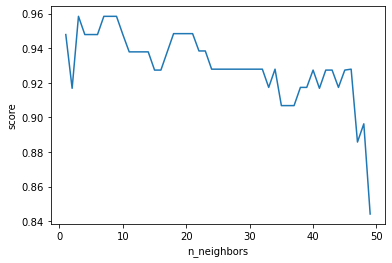

In [119]:
plt.plot(k,val_score.mean(axis=1),label ='validation')
plt.ylabel('score')
plt.xlabel('n_neighbors')

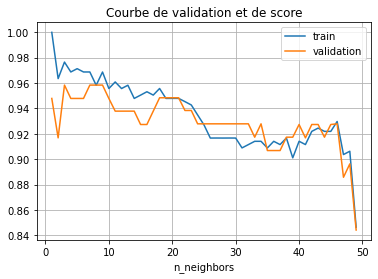

In [120]:
plt.plot(k,train_score.mean(axis=1),label ='train')
plt.plot(k,val_score.mean(axis=1),label ='validation')
plt.xlabel("n_neighbors")
plt.title('Courbe de validation et de score')
plt.grid(True)
plt.legend()
plt.show()

Nous avons une courbe qui est décroît et se correlle, donc pas mal, dans notre cas nous n'avons pas d'over fiting

## Exercice 4 : Optimisation du modèle : recherche des meilleurs hyperparamètres

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state =5)

### 4.1 Créez un dictionnaire qui contient les différents hyperparamètres à savoir le nombre de voisin et le type 

In [123]:
param_grid = {'n_neighbors': np.arange(1, 50),'metric': ['euclidean', 'manhattan']}

### 4.2 Construisez une grille avec plusieurs estimateurs à l’aide de GridSerachCV 

In [124]:
Grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

### 4.3 Entrainez le modèle avec les différentes combinaisons

In [125]:
Grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

### 4.4 Affichez les meilleurs paramètres du modèle en utilisant

In [126]:
print(Grid.best_score_)
print(Grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


### 4.5) Sauvegardez le modèle

In [127]:
model = Grid.best_estimator_

### 4.6) Evaluez les performances de ce modèle sur le jeu de données de test

In [128]:
model.score(X_test, Y_test)

0.9333333333333333

### 4.7) Il est également possible de mesurer les performances au moyen de la matrice de confusion

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(Y_test, model.predict(X_test)) 

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

Les 8 fleurs de la classe on bien été classé, donc une bonne prediction

Les 11 fleurs de la classe 2 on bien été classé, donc une bonne prediction

Les 11 fleurs de la classe 3 nous avons 10 bonnes prediction et un mauvaise prediction 

## Exercice 5 : Interprétation des courbes d’apprentissage 

In [131]:
from sklearn. model_selection import learning_curve

### 1 Prenez nombre de lots =10, pourcentage_debut =0.1, pourcentage_fin = 1.0. Que représente N? 

In [132]:
t_sizes=np.linspace(0.1, 1, 10)
N, train_score, val_score = learning_curve(model, X_train, Y_train,train_sizes=t_sizes, cv=5)
print(N)


[ 9 19 28 38 48 57 67 76 86 96]


Nombre d'exemples de formation par découpe du train set qui ont été utilisé pour l'apprentissage tout en supprimant les doublons

### 2 Affichez les scores moyens sur le jeu de données de validation

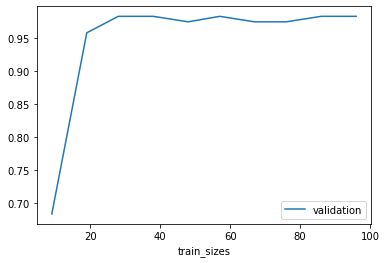

In [134]:
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

### 3 Affichez sur le même graphe que la question précédente, les scores moyens obtenus sur le jeu de données d’entrainement

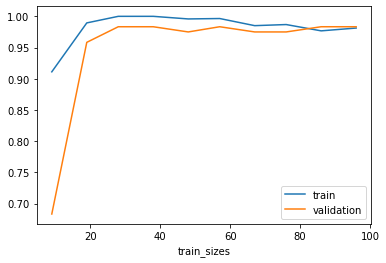

In [135]:
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Nous n'avons presque plus d'evolution de la performance de notre model à partir de plus 70 exemple dans notre train set, donc augmenter le nombre de donner d'exemple du train ne donne pas forcement des meilleurs performance que celle là.